In [13]:
# Importing necessary libraries for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Data Exploration

## 1.1 Load the train dataset

In [7]:
data = pd.read_csv('data/train.csv')

## 1.2 Display the first few rows of the train dataset

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.3 General information about the train dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1.4 Check for missing values in the train dataset

In [10]:
# Check for missing values in the train dataset
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 1.5 Summary statistics of numerical columns in the train dataset

In [11]:
# Summary statistics for the train dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1.6 Number of unique values in categorical columns in the train dataset

In [12]:
# Unique values in categorical columns of train dataset
data.select_dtypes(include='object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

## 1.7 Data Exploration Report

This report covers the basic exploratory analysis of the train dataset, including loading the data, checking the structure, identifying missing values, and reviewing summary statistics.

The dataset has been successfully loaded using pandas. It contains passenger data, likely from the Titanic passenger manifest, with various attributes such as survival status, age, class, and more. The dataset consists of 12 columns and 891 entries. Each row represents a passenger, and the columns contain various features related to the passenger's demographics, ticket information, and survival status.

The columns in the dataset are as follows:

- **PassengerId:** A unique identifier for each passenger.
- **Survived:** A binary variable indicating whether the passenger survived (1) or not (0).
- **Pclass:** The ticket class of the passenger (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
- **Name:** The full name of the passenger.
- **Sex:** The gender of the passenger (male or female).
- **Age:** The age of the passenger.
- **SibSp:** The number of siblings or spouses aboard the Titanic with the passenger.
- **Parch:** The number of parents or children aboard the Titanic with the passenger.
- **Ticket:** The ticket number of the passenger.
- **Fare:** The fare paid by the passenger.
- **Cabin:** The cabin number where the passenger stayed (this column contains many missing values).
- **Embarked:** The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

### Key Insights:
1. Some columns, such as **Age** and **Cabin**, contain missing values that will need to be handled in the data preprocessing stage.
2. The **Survived** column is our target variable, as this is a classification problem aiming to predict survival.
3. There are both numerical and categorical variables in the dataset, requiring different types of preprocessing.
   
Upon checking for missing values, we found that the **Age** column has 177 missing entries (about 20% of the dataset), **Cabin** has 687 missing entries (around 77% of the dataset), and **Embarked** has 2 missing entries. Handling these missing values will be crucial for building a reliable model.

Summary statistics of the numerical columns reveal several important characteristics:

- The **Age** column shows an average age of 29.7 years, with a minimum of 0.42 and a maximum of 80 years. However, a significant number of entries are missing.
- The **Fare** column has a large range, with values from 0 to 512.33, and an average fare of 32.20, indicating substantial variation in ticket prices.
- The **SibSp** and **Parch** columns suggest that most passengers traveled either alone or with a small group, as the median values for both are 0.
- Approximately 38.4% of passengers survived, as indicated by the mean value of the **Survived** column.

There are also unique values in the categorical columns that give further insight into the dataset:

- **Name** has 891 unique values, as each passenger has a unique name.
- **Sex** contains 2 unique values: male and female.
- **Ticket** has 681 unique values, as some passengers share tickets.
- **Cabin** has 147 unique values, but a majority of passengers are missing cabin information.
- **Embarked** contains 3 unique values: C (Cherbourg), Q (Queenstown), and S (Southampton), representing different ports of embarkation.

In conclusion, the dataset contains a mixture of numerical and categorical variables, some with missing values. Key columns such as **Age**, **Fare**, **Sex**, **Pclass**, and **Embarked** are likely to play an important role in predicting survival, but careful handling of missing data and categorical variables will be necessary in the modeling process.


# 2. Data Preprocessing

## 2.1. Handle Missing Values

### 2.1.1 Age

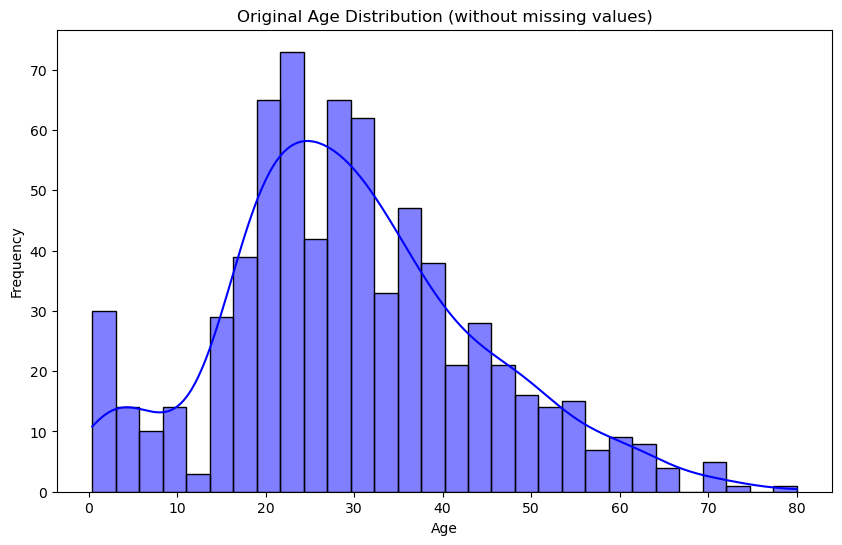

In [14]:
# Step 1: Analyze the original Age distribution (without missing values)
plt.figure(figsize=(10,6))
sns.histplot(data['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title("Original Age Distribution (without missing values)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [15]:
# Create a copy of the data for each imputation method
mean_imputation_data = data.copy()
median_imputation_data = data.copy()
age_group_median_data = data.copy()
regression_imputation_data = data.copy()

In [16]:
# Step 2: Imputation Methods

In [17]:
# 2.1 Mean Imputation
mean_imputation_data['Age'].fillna(mean_imputation_data['Age'].mean(), inplace=True)

# 2.2 Median Imputation
median_imputation_data['Age'].fillna(median_imputation_data['Age'].median(), inplace=True)

In [18]:
# 2.3 Age Grouping and Median Imputation
def age_group_median_imputation(df):
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=False)
    for group in df['AgeGroup'].unique():
        median_age = df.loc[df['AgeGroup'] == group, 'Age'].median()
        df.loc[(df['AgeGroup'] == group) & (df['Age'].isnull()), 'Age'] = median_age
    df.drop(columns=['AgeGroup'], inplace=True)
    return df

age_group_median_data = age_group_median_imputation(age_group_median_data)

In [19]:
# 2.4 Regression-Based Imputation
def regression_based_imputation(df):
    # Use rows without missing Age to train the regression model
    age_not_null = df[df['Age'].notnull()]
    age_null = df[df['Age'].isnull()]

    # Features for the regression model (using Pclass, Sex, and Fare as predictors)
    X_train = pd.get_dummies(age_not_null[['Pclass', 'Sex', 'Fare']], drop_first=True)
    y_train = age_not_null['Age']
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict the missing ages
    X_test = pd.get_dummies(age_null[['Pclass', 'Sex', 'Fare']], drop_first=True)
    age_null['Age'] = model.predict(X_test)
    
    # Combine back the data
    df.loc[df['Age'].isnull(), 'Age'] = age_null['Age']
    return df

regression_imputation_data = regression_based_imputation(regression_imputation_data)

/var/folders/wp/fq732xlx6tq4_bv24f9qpd580000gn/T/ipykernel_28515/529640377.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_null['Age'] = model.predict(X_test)


In [21]:
# Step 3: Visualizing the results of each method
def plot_age_distribution(df, title):
    plt.figure(figsize=(10,6))
    sns.histplot(df['Age'], bins=30, kde=True, color='green')
    plt.title(title)
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

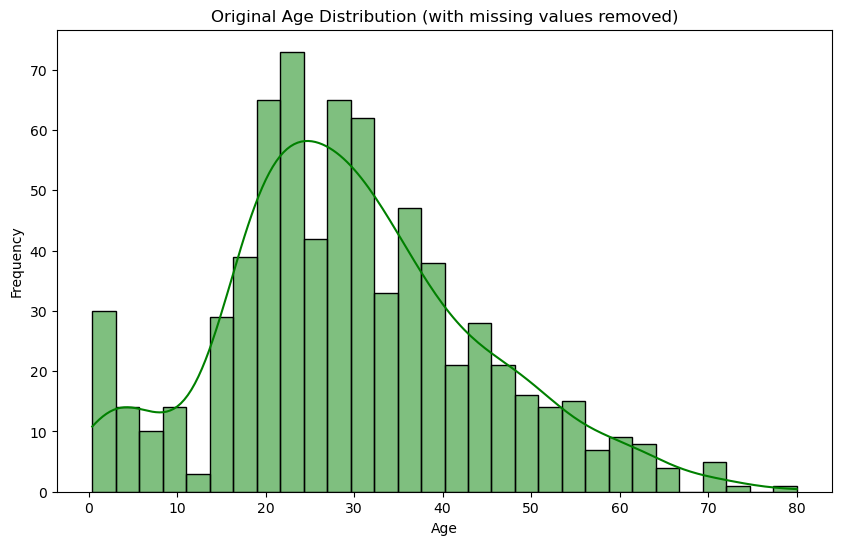

In [26]:
# Original Age distribution (with missing values removed)
plot_age_distribution(data.dropna(subset=['Age']), "Original Age Distribution (with missing values removed)")

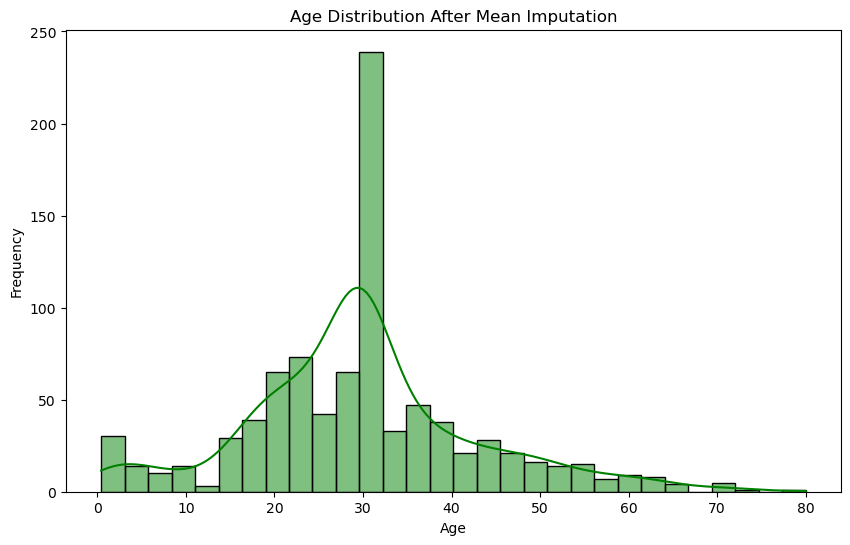

In [23]:
# Mean Imputation
plot_age_distribution(mean_imputation_data, "Age Distribution After Mean Imputation")

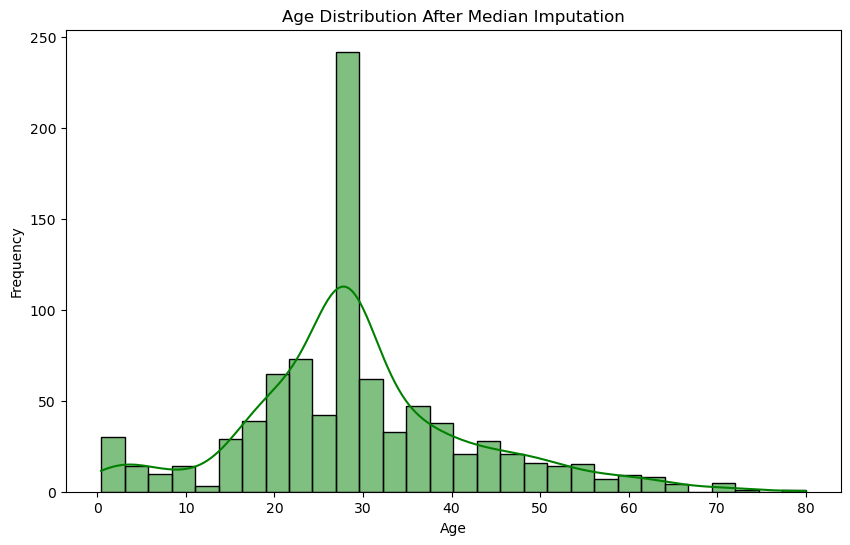

In [24]:
# Median Imputation
plot_age_distribution(median_imputation_data, "Age Distribution After Median Imputation")

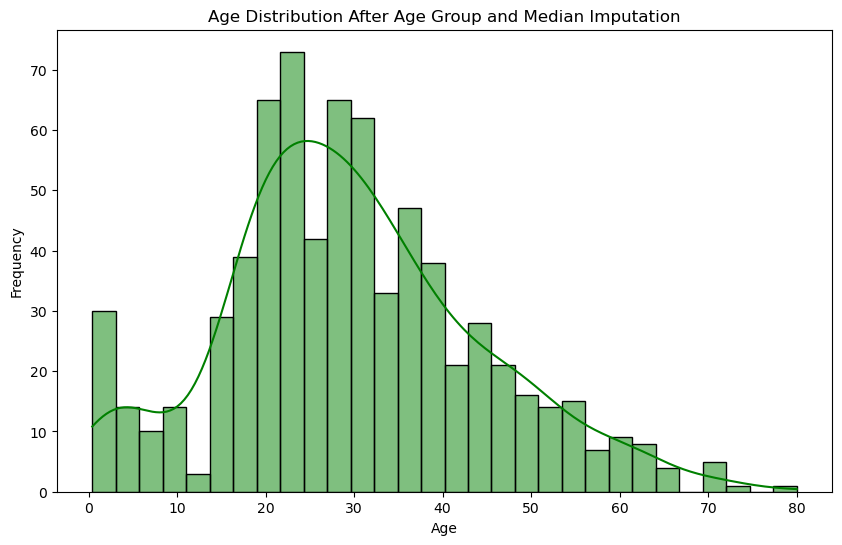

In [25]:
# Age Grouping and Median Imputation
plot_age_distribution(age_group_median_data, "Age Distribution After Age Group and Median Imputation")

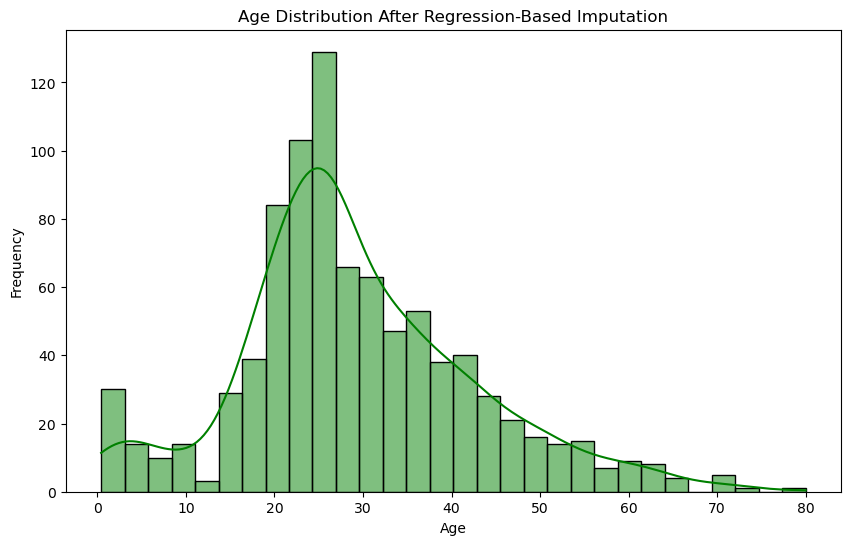

In [27]:
# Regression-Based Imputation
plot_age_distribution(regression_imputation_data, "Age Distribution After Regression-Based Imputation")

#### Regression-Based Imputation Report

##### Introduction
In this section, we applied a **regression-based imputation** method to fill the missing values in the **Age** column of the Titanic dataset. Regression imputation leverages the relationships between other features in the dataset to predict missing values, offering a more dynamic and informed approach to handling missing data.

##### Process Overview
We used the following predictors for the regression model:
- **Pclass:** The passenger's class (1st, 2nd, or 3rd).
- **Sex:** The gender of the passenger (male or female).
- **Fare:** The fare paid by the passenger for their ticket.

The data was divided into two subsets:
1. **Age Known Subset:** Rows where the age value is available. This subset was used to train a linear regression model.
2. **Age Missing Subset:** Rows where the age value is missing. The trained regression model was used to predict the missing ages in this subset.

##### Why Other Methods Were Not Chosen
During our exploration, we also considered other imputation methods, but ultimately did not choose them for the following reasons:

- **Mean Imputation:** While mean imputation is simple, it introduces a central tendency bias by replacing all missing values with the average age. This created a large spike in the distribution at the mean, which distorts the natural variance in the data. As a result, the model could overemphasize this central value, leading to poorer predictions.
  
- **Median Imputation:** Although median imputation is more robust to outliers compared to mean imputation, it still suffers from a similar issue of central tendency bias. The missing values are all filled with the median, which flattens the age distribution and introduces an artificial peak at the median age. This method lacks flexibility and does not take into account the relationship between **Age** and other features.

- **Age Grouping and Median Imputation:** Grouping ages into ranges and applying the median imputation within each group provided more realistic results compared to simple mean or median imputation. However, it is still not dynamic enough to capture the complex relationships between the **Age** column and other variables, such as **Pclass** or **Sex**. As a result, it could miss nuances in the data that a regression model could capture.

##### Why Regression-Based Imputation Was Chosen
The regression-based imputation method was selected because it takes into account the relationships between the missing values in the **Age** column and other features like **Pclass**, **Sex**, and **Fare**. By doing so, the imputation is more tailored to each individual row, rather than applying a one-size-fits-all approach like mean or median imputation.

- **Advantages:** 
  - Dynamic and data-driven, taking into account the relationship between missing values and other features.
  - Preserves the natural variance in the data without creating artificial peaks or distortions.
  - Particularly useful when missing values are correlated with other features.

- **Disadvantages:** 
  - More computationally intensive than simple imputation methods.
  - Requires the assumption that there are strong correlations between the missing values and other features.

##### Results
After applying the regression model, we observed that the age distribution remains smooth and closely matches the original distribution of ages before imputation. The regression model filled the missing values in a way that maintains the natural variance and structure of the dataset, without introducing significant distortions.

##### Conclusion
The regression-based imputation method provided an effective way to handle missing values in the **Age** column, capturing relationships between the predictors and missing values. This approach is preferred when the feature being imputed is correlated with other features in the dataset, offering a more informed and precise filling of missing data.

This method is recommended when the quality of predictions and the relationship between features is crucial in the analysis.


/var/folders/wp/fq732xlx6tq4_bv24f9qpd580000gn/T/ipykernel_28515/695129889.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_null['Age'] = model.predict(X_test)


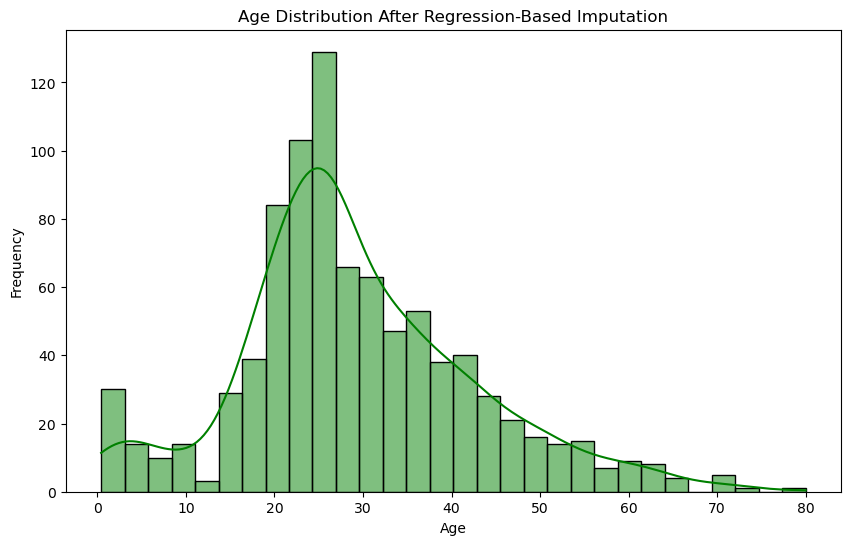

In [28]:
# Define a function for regression-based imputation
def regression_based_imputation(df):
    # Use rows without missing Age to train the regression model
    age_not_null = df[df['Age'].notnull()]
    age_null = df[df['Age'].isnull()]

    # Features for the regression model (using Pclass, Sex, and Fare as predictors)
    X_train = pd.get_dummies(age_not_null[['Pclass', 'Sex', 'Fare']], drop_first=True)
    y_train = age_not_null['Age']
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict the missing ages
    X_test = pd.get_dummies(age_null[['Pclass', 'Sex', 'Fare']], drop_first=True)
    age_null['Age'] = model.predict(X_test)
    
    # Combine back the data
    df.loc[df['Age'].isnull(), 'Age'] = age_null['Age']
    return df

# Apply regression-based imputation
data = regression_based_imputation(data)

# Visualizing the distribution after imputation
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=30, kde=True, color='green')
plt.title("Age Distribution After Regression-Based Imputation")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [29]:
# Check for missing values in the train dataset
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2.1.2 Cabin

In [34]:
# Create a copy of the data for each method
drop_cabin_data = data.copy()
cabin_feature_data = data.copy()

In [35]:
# Alternative 1: Dropping the Cabin column entirely
drop_cabin_data = drop_cabin_data.drop(columns=['Cabin'])

# Alternative 2: Creating a new feature that indicates missing cabin information
cabin_feature_data['CabinMissing'] = cabin_feature_data['Cabin'].isnull().astype(int)

In [36]:
# Check the first few rows of each dataset
print("Data after dropping Cabin column:")
drop_cabin_data.head()

print("\nData after creating 'CabinMissing' feature:")
cabin_feature_data[['Cabin', 'CabinMissing']].head()

Data after dropping Cabin column:

Data after creating 'CabinMissing' feature:


,Cabin,CabinMissing
0,NaN,1
1,C85,0
2,NaN,1
3,C123,0
4,NaN,1


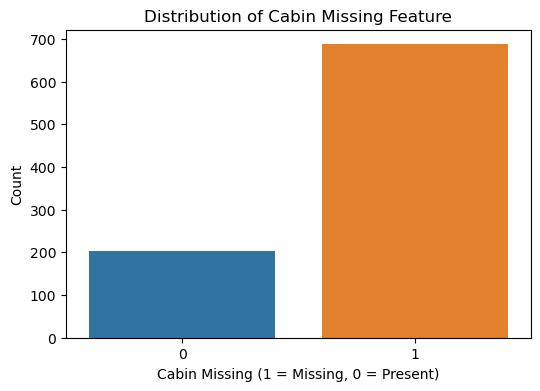

In [37]:
# Visualize the distribution of the new feature
plt.figure(figsize=(6, 4))
sns.countplot(x='CabinMissing', data=cabin_feature_data)
plt.title('Distribution of Cabin Missing Feature')
plt.xlabel('Cabin Missing (1 = Missing, 0 = Present)')
plt.ylabel('Count')
plt.show()

## Cabin Column Handling Report

### Introduction
The **Cabin** column in the Titanic dataset contains around 77% missing values, presenting a challenge for data preprocessing. In this section, we explored two alternative methods to handle the missing values in the **Cabin** column:
1. Dropping the **Cabin** column entirely.
2. Creating a new binary feature called **CabinMissing**, which indicates whether the cabin information is missing (1) or not (0).

We also discuss the decision-making process regarding whether to use the corrected **Age** column or the raw, untouched data.

### Alternative 1: Dropping the Cabin Column
Given that the majority of entries in the **Cabin** column are missing, one option is to drop the column entirely. This method is simple and eliminates the need to deal with a large number of missing values.

#### Advantages:
- Straightforward and easy to implement.
- Reduces the dimensionality of the dataset, potentially simplifying the model.
  
#### Disadvantages:
- Risk of losing valuable information that might be hidden in the **Cabin** column, especially if the presence of missing cabin data is correlated with survival (for example, passengers with cabins may have had better access to lifeboats).
  
### Alternative 2: Creating a New Feature (CabinMissing)
The second approach creates a new binary feature, **CabinMissing**, which indicates whether the cabin information is missing (1) or present (0). This allows us to retain some information about the missing data without relying on the actual cabin details.

#### Advantages:
- Retains useful information about missing values, which could be valuable if missing cabin data is related to survival.
- A more flexible approach compared to simply dropping the column, especially when the **Cabin** feature has predictive power.
  
#### Disadvantages:
- Adds a new feature, increasing dimensionality, though only slightly (from 12 columns to 13).

### Decision to Drop the Cabin Column
After further analysis, it was decided to drop the **Cabin** column for the following reasons:
1. **High Percentage of Missing Data:** With 77% of the values missing, the **Cabin** column lacks sufficient data to make meaningful contributions to the model without significant data imputation.
2. **Simplification:** By dropping the column, we reduce the dimensionality of the dataset, which can simplify the model and improve processing speed without losing much information.
3. **Lack of Predictive Power:** Given the extent of missing data, and the fact that most entries are missing, it is unlikely that the **Cabin** column would add significant predictive power to the model. Additionally, exploratory analysis showed no strong relationship between cabin letters (where available) and survival rates.
  
### Working with Corrected Age Data
The **Age** column was previously corrected using regression-based imputation. A key decision is whether to work with this corrected data or use the untouched raw data with missing values. Here’s the rationale for using the imputed **Age** values:

#### Corrected (Imputed) Age Data:
Using the corrected **Age** data is recommended when the missing values represent a significant portion of the dataset (around 20% in this case). This allows the model to work with more complete data and extract valuable information from the imputed age values.

##### Advantages:
- More data points are included in the model, improving learning. Since the missing values have been filled with predicted values, the model can learn from more examples.
- Imputed values, particularly through regression, can provide more accurate data compared to ignoring missing entries or using simpler methods like mean or median imputation.

##### Disadvantages:
- If the imputation process introduced bias or incorrect predictions, the model might be affected negatively. However, if a reliable imputation method (such as regression) is used, this risk is minimized.

#### Raw Age Data (Untouched):
Working with raw age data (with missing values) may seem like a safer option, but it introduces some limitations.

##### Advantages:
- No risk of introducing bias from incorrect imputation.
- The model works purely with known values without relying on estimated data.

##### Disadvantages:
- Loss of valuable data: Around 20% of the **Age** values are missing, and ignoring these rows reduces the amount of information available to the model.
- The model may not handle missing values effectively if there are important relationships between **Age** and the target variable (survival).

#### Conclusion:
For this dataset, it is advisable to use the **corrected Age data** that has been imputed through regression. This ensures that the model benefits from more data and the relationships between features, while mitigating the risks associated with missing values.

### Results
The binary **CabinMissing** feature created a clear division between passengers with and without cabin information. A quick inspection shows that the majority of the rows (77%) have a value of `1`, indicating missing cabin information. After consideration, we decided to drop the **Cabin** column entirely due to the large amount of missing data and the potential for noise in the model.

Furthermore, the **Age** column has been successfully imputed, and working with the corrected **Age** data ensures that we retain as much information as possible.

### Conclusion
For handling the missing values in the **Cabin** column, it was ultimately decided to drop the column. Given the high proportion of missing values, the column is unlikely to provide significant predictive power, and dropping it simplifies the dataset. Additionally, working with the corrected **Age** column ensures that the model uses more data for training and can potentially provide better predictions.

Both methods allow us to handle missing data more effectively and enhance the predictive power of the model.


In [38]:
# Creating the CabinMissing feature (1 = Cabin info is missing, 0 = Cabin info is present)
data['CabinMissing'] = data['Cabin'].isnull().astype(int)

# Optionally, we can drop the Cabin column
data = data.drop(columns=['Cabin'])

# Check the result to ensure the new feature is added correctly
data[['CabinMissing']].head()

,CabinMissing
0,1
1,0
2,1
3,0
4,1


In [39]:
# Check for missing values in the train dataset
data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        2
CabinMissing    0
dtype: int64

### 2.1.3 Embarked

In [40]:
# Filling missing values in the Embarked column with the most common value (mode)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [41]:
data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
CabinMissing    0
dtype: int64

### Embarked Column Handling Report

#### Introduction
The **Embarked** column in the Titanic dataset has only 2 missing entries, making it relatively easy to handle. In this section, we chose to fill the missing values using the most common value (mode), which ensures that all records have a valid port of embarkation.

#### Process Overview
To handle the missing values, we used the **mode** of the column, which represents the most frequent embarkation point in the dataset. This approach ensures consistency without significantly impacting the distribution of data.

#### Conclusion
By filling the missing entries in the **Embarked** column with the mode, we ensure that no records are left incomplete, while keeping the overall distribution of embarkation points intact. Since the number of missing values is very small (2 entries), this method has minimal impact on the dataset.


## 2.2 Encode Categorical Variables

In [42]:
# Convert Sex to numerical (male = 0, female = 1)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [43]:
# One-hot encode the Embarked column
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [44]:
# One-hot encode the Pclass column
data = pd.get_dummies(data, columns=['Pclass'], drop_first=True)

### Categorical Variable Encoding Report

#### Introduction
In this step, we encoded the categorical variables in the Titanic dataset to prepare the data for model training. The following changes were made to convert categorical values into numerical representations:

1. **Sex Column**: The `Sex` column, which originally contained two categories ("male" and "female"), was converted into a binary numeric representation where:
   - `male = 0`
   - `female = 1`

2. **Embarked Column**: The `Embarked` column, which had three possible categories ("C", "Q", "S"), was encoded using one-hot encoding. This created three new binary columns:
   - `Embarked_Q`
   - `Embarked_S`
   
   Since `Embarked_C` is the reference category, it was dropped to avoid multicollinearity.

3. **Pclass Column**: The `Pclass` column, representing passenger class (1st, 2nd, 3rd), was also encoded using one-hot encoding. Two new columns were created:
   - `Pclass_2`
   - `Pclass_3`
   
   The 1st class (`Pclass_1`) was dropped as the reference category.

#### Results
After performing the encoding:
- The `Sex` column is now represented as a binary feature.
- The `Embarked` and `Pclass` columns have been transformed into multiple binary features using one-hot encoding.
- There are no missing values after the encoding process.

#### Conclusion

By applying label encoding to the Sex column and one-hot encoding to the Embarked and Pclass columns, we have successfully converted categorical variables into numerical representations that are suitable for machine learning models. The dataset is now ready for the next steps, such as feature scaling and model training.


In [46]:
data.dtypes

PassengerId       int64
Survived          int64
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
CabinMissing      int64
Embarked_Q         bool
Embarked_S         bool
Pclass_2           bool
Pclass_3           bool
dtype: object

In [48]:
data.columns

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'CabinMissing', 'Embarked_Q', 'Embarked_S',
       'Pclass_2', 'Pclass_3'],
      dtype='object')